<a href="https://colab.research.google.com/github/Hailos1/CarMars/blob/main/test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вопросы

1) Как хорошо Вы владеете Python? Оцените свой уровень по шкале от 0 до 10,
где 0 - совсем не знаю, 10 - владею в совершенстве.
Объясните, почему Вы выбрали такой балл.

Python = 6 - знаю основы и умею работать с популярными библиотеками. В данный момент начала проходить курс по ML.


2) Насколько хорошо Вы знакомы с Google Sheets? Оцените свой уровень по
шкале от 0 до 10, где 0 - совсем не знаю, 10 - владею в совершенстве.
Объясните, почему Вы выбрали такой балл.


Google sheets = 6, с самим google sheets не работала так много и явно, как с Эксель, но технологии являются схожими. В самом google sheets веду свои таблички для учёта некоторых вещей в личной жизни.

# Задачи на логику

1) Рекламная кампания стартовала вчера с дневным бюджетом 40 $. Половина бюджета была израсходована к полудню, а 80% оставшегося бюджета было потрачено между полуднем и временем закрытия. Сколько долларов не было потрачено?


**4**

2) 5 идентичных рекламных кампаний работали 24 дня по 6 часов в день, потрачено было 120 долларов. Сколько дней они работали бы на 216 долларов, если бы 9 одинаковых кампаний работали бы по 8 часов в день?


**18**

3) Дизайнеры создали 200 рекламных баннеров для двух рекламных кампаний. 80 из них не использовались ни в кампании №1, ни в кампании №2, 60 использовались только в кампании №1. И для каждого рекламного баннера, который использовался в обеих кампаниях, приходится 3 баннера, которые использовались только в кампании №2. Сколько баннеров было использовано в обеих рекламных кампаниях?

**15**

4) Энн использует Instagram, но не Facebook, а Джон использует Youtube и Facebook. Кейт использует Youtube, но не Instagram, а Том использует Facebook, но не Youtube. Если каждый человек использует две из трех социальных сетей, у кого предпочтения совпадают?

**Джон и Кейт**

5) Средний итоговый балл стажера по 4 модулям составляет 78 баллов. Сколько баллов должен получить стажер за 5-й модуль, чтобы средний балл по всему заданию составил 80?


**88**

6) Заказанные в приложении товары доставляются на автомобиле. Автомобиль проезжает 260 км со средней скоростью 80 км / ч. На обратном пути машина движется со средней скоростью 100 км / ч. Насколько быстрее был обратный путь? Ответ указать в минутах.

**39**

# Техническое задание

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%precision %.2f

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
path = "/content/drive/MyDrive/data/data.xlsx"
df = pd.read_excel(path)

In [ ]:
df

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaT
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaT
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaT
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08


In [37]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce')

**1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.** — 757831

In [38]:
round(df[(df['status'] != 'ПРОСРОЧЕНО') & (df['receiving_date'].dt.month == 7)]['sum'].sum())

757831

**2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком**

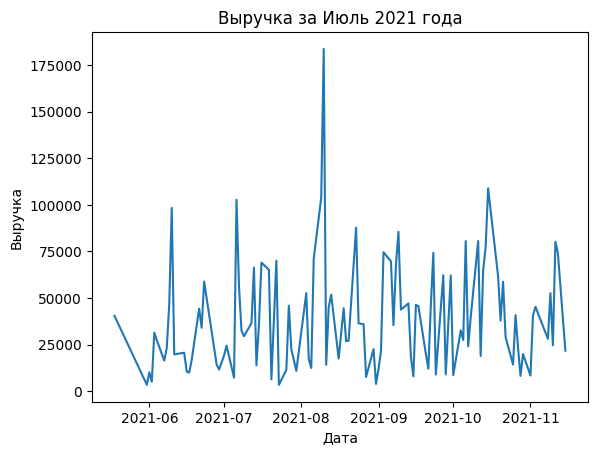

In [39]:
revenue_df = df.groupby('receiving_date')['sum'].sum().reset_index()

sns.lineplot(x="receiving_date", y="sum", data=revenue_df)
plt.title('Выручка за Июль 2021 года')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

**3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?** — Петрова, 219240

In [40]:
sale_df = df[df['receiving_date'].dt.month == 9].groupby('sale')['sum'].sum()
sale_df.idxmax(), round(sale_df.max())

('Петрова', 219240)

**4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?** — текущая


In [41]:
transaction_type = df[(df['receiving_date'].dt.month == 10)]['new/current'].value_counts()
transaction_type.idxmax()

'текущая'

**5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?** — 76

In [42]:
df[(df['receiving_date'].dt.month == 6) & (df['document'] == 'оригинал')].shape[0]

76

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
* 1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
* 2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021

In [43]:
def calculate_bonus(data, target_month):
    # Фильтруем данные, чтобы учесть только сделки, которые были заключены после target_month
    filtered_data = data[data['receiving_date'].dt.month > target_month]

    # Проверяем, есть ли оригинал в документе
    filtered_data['has_original'] = filtered_data['document'].str.contains('оригинал', case=False, na=False)

    # Рассчитываем бонус для новых сделок
    new_deals = filtered_data[
        (filtered_data['new/current'] == 'новая') &
        (filtered_data['status'] == 'ОПЛАЧЕНО') &
        (filtered_data['has_original'])
    ]
    new_bonus = new_deals.groupby('sale')['sum'].sum() * 0.07

    # Рассчитываем бонус для текущих сделок
    current_deals = filtered_data[
        (filtered_data['new/current'] == 'текущая') &
        (filtered_data['status'] != 'ПРОСРОЧЕНО') &
        (filtered_data['has_original'])
    ]

    # Применяем условия для расчета текущих бонусов
    current_deals['bonus'] = current_deals.apply(
        lambda row: row['sum'] * 0.05 if row['sum'] > 10000 else row['sum'] * 0.03,
        axis=1
    )

    current_bonus = current_deals.groupby('sale')['bonus'].sum()

    # Объединяем результаты
    total_bonus = new_bonus.add(current_bonus, fill_value=0)

    # Преобразуем в словарь
    bonus_remainder = total_bonus.to_dict()

    return bonus_remainder

In [45]:
# Вызов функции для расчета бонуса
bonus_remainder_on_july_1 = calculate_bonus(df, 6)

print("Остаток бонусов на 01.07.2021:")
for manager, bonus in bonus_remainder_on_july_1.items():
    print(f"{manager}: {bonus:.2f}")

Остаток бонусов на 01.07.2021:
Андреев: 26175.95
Васильев: 6934.60
Иванов: 22254.26
Кузнецова: 16108.77
Михайлов: 607.07
Петрова: 27753.65
Селиванов: 7102.46
Смирнов: 30073.14
Соколов: 3730.71
Филимонова: 10830.53
